# Evaluation metrics

### Goal:
In order to evaluate the performance of a DL or ML model and answering the the question of "Do we need more optimization? is the model working good enough? Is it ready to implement and being used in real world applications?" we need to evaluate the performance.
Traditionally it occures by comparing the output of our Model with the available lables. How much do they differ?

There are various methods for evaluation and each of them has a specific applicaiton. Although some of them are more famous and have more application, here I gathered all of them together. So, whenever you here the name of one, you will remember what it evaluates.

Enjoy learning :)

### Syllabus:
#### Confusion Matrix
#### Accuracy
#### Precision
#### Recall
#### F1-score
#### Type I & Type II Error
#### Sensitivity
#### Specificity
#### Area Under the Curve (AUC)
#### ROC

### 0- Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 0- Model execution

In [3]:
################### Binomial Classification: Model 1 ###################
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X1 = dataset.iloc[:, [2, 3]].values
y1 = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train1, y_train1)

# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)


In [4]:
################### Multi-class classificaiton: Model 2 ###################
# data:
df=sns.load_dataset("iris")

# Spliting into features and label groups
data = df.values
X2 = data[:,0:4]
Y2 = data[:,4]

# Split the data to train and test sets
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2)

# Support vector machine algorithm
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train2, y_train2)

# Predict from the test dataset
y_pred2 = svm.predict(X_test2)

### 1- Confusion Matrix:

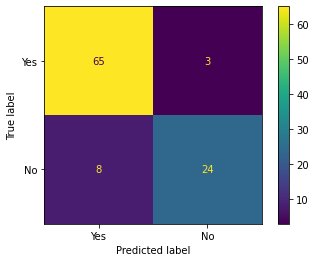

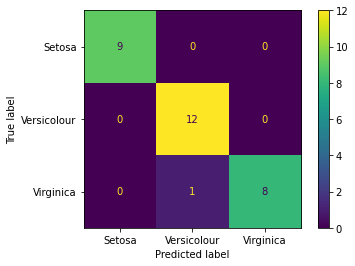

In [6]:
########## Model 1: Binomial Classifier ##########
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_test1, y_pred1)
cm_dis1 = ConfusionMatrixDisplay(confusion_matrix = cm1 , display_labels = ['Yes', 'No'])
cm_dis1.plot()

########## Model 2: Multi-class Classifier ##########
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm2 = confusion_matrix(y_test2, y_pred2)
cm_dis2 = ConfusionMatrixDisplay(confusion_matrix = cm2 , display_labels = ['Setosa', 'Versicolour', 'Virginica'])
cm_dis2.plot()


In [50]:
# Confusion Matrix parameters:
TP, FN, FP, TN = cm1.ravel()
print ("First Cnfusion Matrix Parameters; TP, FN, FP, TN =  ", TP, FN, FP, TN)


First Cnfusion Matrix Parameters; TP, FN, FP, TN =   65 3 8 24


In [58]:
##### Multiclass CM:
TP = []
TN = []
FP = []
FN = []

for i in range(cm2.shape[0]):
    tp = cm2[i, i]; TP.append(tp)
    fp = np.sum(cm2[i, :]) - cm2[i, i]; FP.append(fp)
    fn = np.sum(cm2[:, i]) - cm2[i, i]; FN.append(fn)
    tn = np.sum(cm2) +cm2[i, i] -np.sum(cm2[i, :]) -np.sum(cm2[:, i]); TN.append(tn)
    Accuracy = (tp+tn)/np.sum(cm2).sum()
    Precision = tp/(tp+fp)
    Recall = tp/(tp+fn)
    F1_score = (2*Precision*Recall)/(Precision + Recall)
    print(Accuracy, Precision, Recall, F1_score)

# Step 3: Sum the TP, TN, FP, and FN across all classes
overall_TP = np.sum(TP)
overall_TN = np.sum(TN)
overall_FP = np.sum(FP)
overall_FN = np.sum(FN)

Accuracy_overall = (overall_TP + overall_TN)/np.sum(cm2).sum()
Precision_overall = overall_TP/(overall_TP + overall_FP)
Recall_overall = overall_TP/(overall_TP + overall_FN)
F1_score_overall = (2*Precision_overall*Recall_overall)/(Precision_overall+Recall_overall)


print ("Second Cnfusion Matrix Parameters; TP, FN, FP, TN =  ", overall_TP, overall_FN, overall_FP, overall_TN)
print("TP: ", TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

print("overall parameters: ")
print("Accuracy: ", Accuracy_overall)
print("Precision: ", Precision_overall)
print("Recall: ", Recall_overall)
print("F1_score: ", F1_score_overall)

1.0 1.0 1.0 1.0
0.9666666666666667 1.0 0.9230769230769231 0.9600000000000001
0.9666666666666667 0.8888888888888888 1.0 0.9411764705882353
Second Cnfusion Matrix Parameters; TP, FN, FP, TN =   29 1 1 59
TP:  [9, 12, 8]
TN:  [21, 17, 21]
FP:  [0, 0, 1]
FN:  [0, 1, 0]
overall parameters: 
Accuracy:  0.9666666666666667
Precision:  0.9666666666666667
Recall:  0.9666666666666667
F1_score:  0.9666666666666667


In [57]:
np.sum(cm2).sum()

30